<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> K-Means Clustering Exercises in R</font></h1>

   ### Exercise 1: Wholesale Customer Analysis

A wholesale distributor wants to design a targeted marketing campaign based on their customers' spendings.
We have set of customer annual spending data for 6 categories of goods.

In [1]:
# download file and save 
download.file("https://ibm.box.com/shared/static/36ulo2vaeqyglj1dxz3b75093vdmgp5q.csv", destfile = "wholesale_customers.csv", quiet = FALSE)
sale <- read.csv("wholesale_customers.csv", sep =',')
## What does the dataset look like?  ##
head(sale)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


#### 1) How to decide the K value?

In [2]:
## Hint: Exclude the Channel and Region variables first before clustering ## 

## Your Answer Code Here ## 

threshold <- 1.5 # define threshold
## Answer Code: ##
# Cleaning up the data
# This creates z-scores for the six inputs
sale.group <- sale
sale.group$Channel <- NULL
sale.group$Region <- NULL

milk_mean = mean(sale.group$Milk)
milk_sd = sd(sale.group$Milk)
fresh_mean = mean(sale.group$Fresh)
fresh_sd = sd(sale.group$Fresh)
gro_mean = mean(sale.group$Grocery)
gro_sd = sd(sale.group$Grocery)
frozen_mean = mean(sale.group$Frozen)
frozen_sd = sd(sale.group$Frozen)
paper_mean = mean(sale.group$Detergents_Paper)
paper_sd = sd(sale.group$Detergents_Paper)
del_mean = mean(sale.group$Delicassen)
del_sd = sd(sale.group$Delicassen)

sale.group$Milk <- (sale.group$Milk - milk_mean) / milk_sd
sale.group$Fresh <- (sale.group$Fresh - fresh_mean) / fresh_sd
sale.group$Grocery <- (sale.group$Grocery - gro_mean) / gro_sd
sale.group$Frozen <- (sale.group$Frozen - frozen_mean) / frozen_sd
sale.group$Detergents_Paper <- (sale.group$Detergents_Paper - paper_mean) / paper_sd
sale.group$Delicassen <- (sale.group$Delicassen - del_mean) / del_sd


<div align="right">
<a href="#p1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p1" class="collapse">
```
threshold <- 1.5 # define threshold
## Answer Code: ##
# Cleaning up the data
sale.group <- sale
sale.group$Channel <- NULL
sale.group$Region <- NULL

milk_mean = mean(sale.group$Milk)
milk_sd = sd(sale.group$Milk)
fresh_mean = mean(sale.group$Fresh)
fresh_sd = sd(sale.group$Fresh)
gro_mean = mean(sale.group$Grocery)
gro_sd = sd(sale.group$Grocery)
frozen_mean = mean(sale.group$Frozen)
frozen_sd = sd(sale.group$Frozen)
paper_mean = mean(sale.group$Detergents_Paper)
paper_sd = sd(sale.group$Detergents_Paper)
del_mean = mean(sale.group$Delicassen)
del_sd = sd(sale.group$Delicassen)

sale.group$Milk <- (sale.group$Milk - milk_mean) / milk_sd
sale.group$Fresh <- (sale.group$Fresh - fresh_mean) / fresh_sd
sale.group$Grocery <- (sale.group$Grocery - gro_mean) / gro_sd
sale.group$Frozen <- (sale.group$Frozen - frozen_mean) / frozen_sd
sale.group$Detergents_Paper <- (sale.group$Detergents_Paper - paper_mean) / paper_sd
sale.group$Delicassen <- (sale.group$Delicassen - del_mean) / del_sd
    
```
</div>

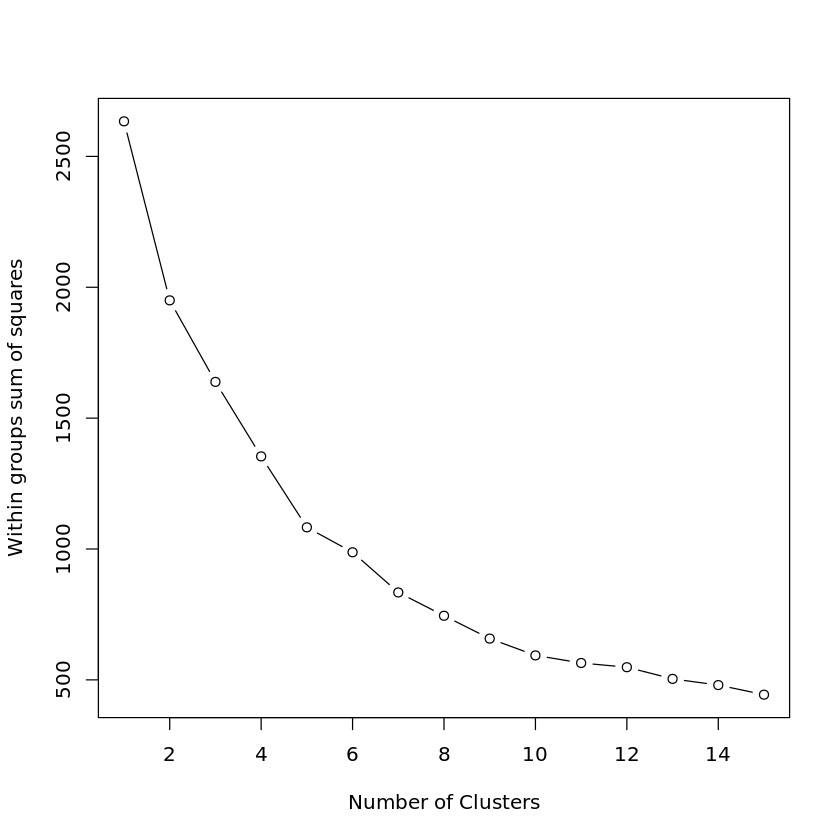

In [3]:
# Elbow Method: Help choose the value of K which minimize the standard deviation within each cluster
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

wssplot(sale.group)  


Based on this elbow method, we would select 5 clusters. 

Notice: Another way of finding the optimal K is ploting of Hubert index. The Hubert index is a graphical method of determining the number of clusters.In the plot of Hubert index, we seek a significant knee that corresponds to a significant increase of the value of the measure i.e the significant peak in Hubert index second differences plot. 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


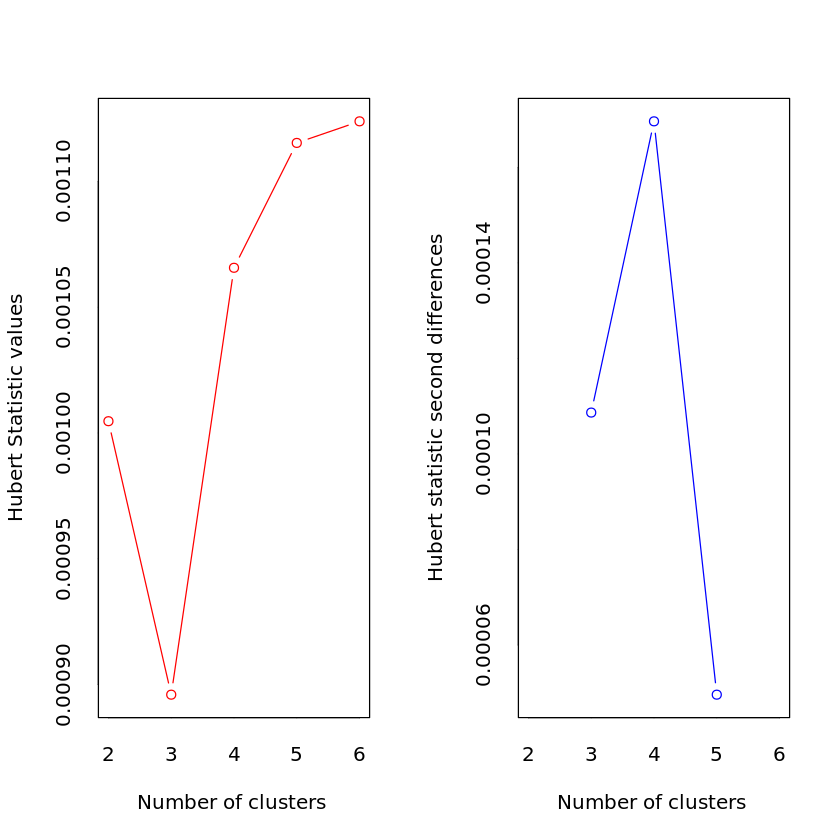

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 7 proposed 5 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 



0 2 3 4 5 6 
2 6 6 3 7 2 

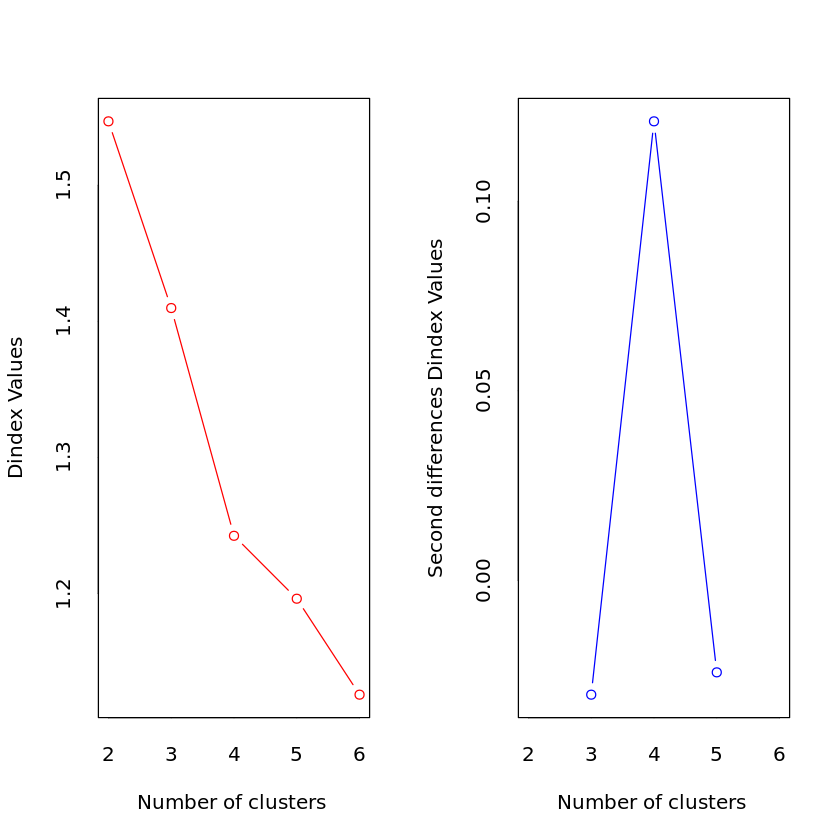

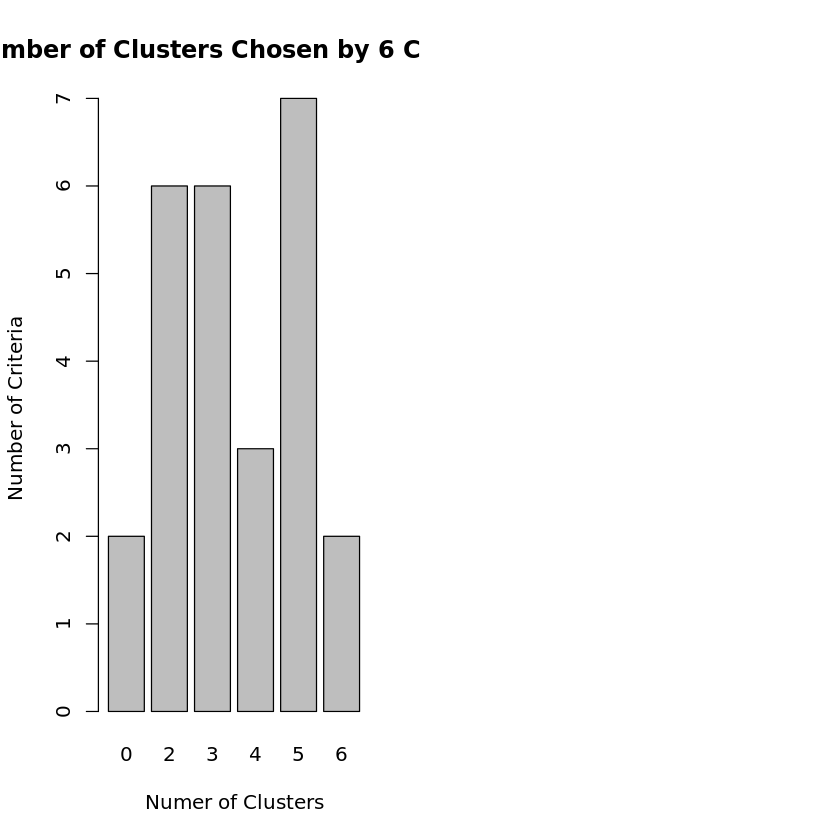

In [4]:
# We can also look at how the optimal K changes along with the number of criteria

install.packages("NbClust")
library(NbClust)
set.seed(12345)
nc <- NbClust(sale.group, min.nc=2, max.nc=6, method="kmeans")
table(nc$Best.n[1,])

barplot(table(nc$Best.n[1,]), 
          xlab="Numer of Clusters", ylab="Number of Criteria",
          main="Number of Clusters Chosen by 6 Criteria")


**Answer: k = 5**

Tip: Practically when choosing K we usually need to consider how many clusters will best answer downstream questions. 

#### 2) If we set K = 5, how do the spendings on Fresh and Frozen foods of each cluster look like?

In [5]:
## Your Answer Code Here: ##

result <- kmeans(sale.group, 5)  
Cluster_centroids <- as.data.frame(result$centers)
spending <- Cluster_centroids
spending$Fresh <- (spending$Fresh * fresh_sd) + fresh_mean
spending$Frozen <- (spending$Frozen * frozen_sd) + frozen_mean

# the spending on fresh food for the five clusters
spending[,1]

# the spending on frozen food for the five clusters
spending[,4]


[1]  8352.301 15964.900 52022.000  5355.106 29879.276

[1]  2221.039  3054.600 29825.500  1409.436  6588.539

<div align="right">
<a href="#p2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p2" class="collapse">
```
result <- kmeans(sale.group, 5)  
Cluster_centroids <- as.data.frame(result$centers)
spending <- Cluster_centroids
spending$Fresh <- (spending$Fresh * fresh_sd) + fresh_mean
spending$Frozen <- (spending$Frozen * frozen_sd) + frozen_mean

# the spending on fresh food for the five clusters
spending[,1]

# the spending on frozen food for the five clusters
spending[,4]
    
```
</div>

In [6]:
## spending of all the categories in the five clusters 
spending

Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
8352.301,-0.3876597,-0.4346353,2221.039,-0.39118442,-0.20047983
15964.900,3.9174467,4.2707490,3054.600,4.61291490,0.50279301
52022.000,3.5092697,1.1090489,29825.500,-0.03827575,6.42932569
5355.106,0.6517369,0.9079295,1409.436,0.91882321,0.03186155
29879.276,-0.2004466,-0.2792423,6588.539,-0.42371338,0.23135024


#### 3) How well did the K-means clustering uncover the actual structure of the data contained in the Channel variable?

In [7]:
install.packages("flexclust")
library(flexclust)

also installing the dependency ‘modeltools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


In [8]:
# A cross-tabulation of Channel and cluster membership is given by:

## Your Answer Code Here: ##

ch.fit <- table(sale$Channel, result$cluster)
ch.fit
randIndex(ch.fit) 


   
      1   2   3   4   5
  1 220   0   3   9  66
  2  36  10   1  85  10

ARI 
0.3300146

<div align="right">
<a href="#p3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p3" class="collapse">
```
# A cross-tabulation of Channel and cluster membership is given by

ch.fit <- table(sale$Channel, result$cluster)
ch.fit
randIndex(ch.fit) 
    
```
</div>

**Answer:** 

**ARI is the adjusted Rand index**. The Rand index is a measure of the similarity between two data clusterings. Here ARI is 0.33, so the similarity between the two clusterings is not very similar. 

The clusters based on annual spending doesn't quite represent Channel structure which implies the marketing campaigns may not necessarily be channel-specific.


### Exercise 2: Image Compression

#### 1) Think about how K-means can be applied on image data compression

If we see each pixel as a data point then choose the number of colours(K) that best groups the pixels in 3-dimensional(RGB encoding) space. The K-means clustering will reduce the colours of the image to K. It's a practice of balancing between efficiency and sharpness.


#### 2) Plot the original image 
Find the sample JPG. picture below:
https://ibm.box.com/shared/static/w9nnfoxpr9rnb1qw82gcrapgadzh3onn.jpg

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<font size = 3><strong>Comment:</strong></font>
<br>
<br>
Added code to download the image and store it under resources.<p></p>

</div>

In [9]:
install.packages("jpeg")
library("jpeg")
download.file("https://ibm.box.com/shared/static/w9nnfoxpr9rnb1qw82gcrapgadzh3onn.jpg","/resources/data/exercise2.jpg")

pic <- readJPEG("/resources/data/exercise2.jpg")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


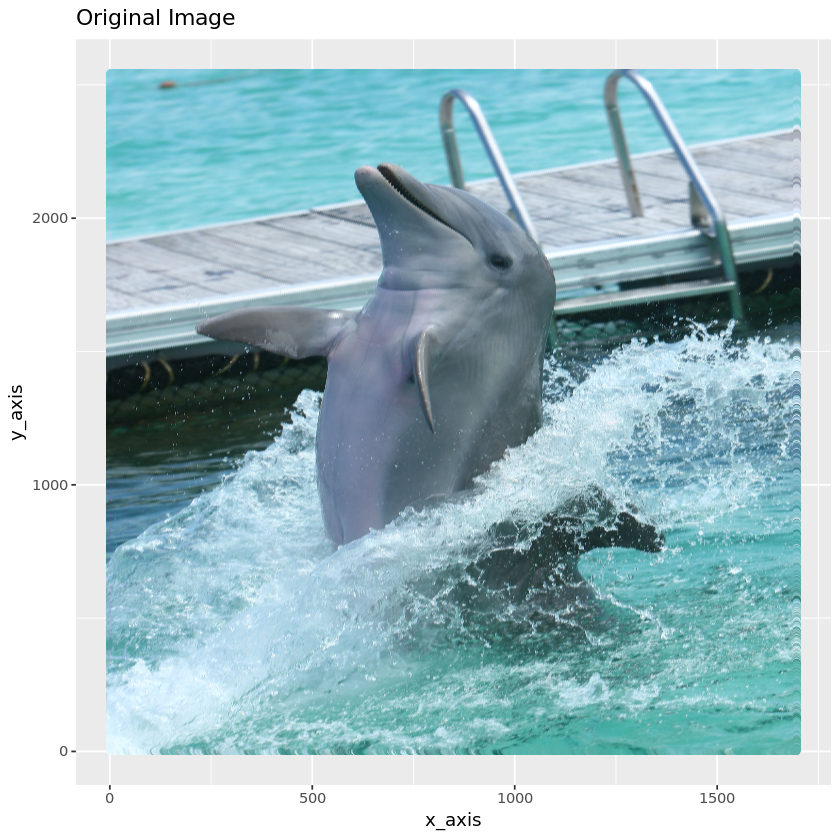

In [10]:
## Your Answer Code Here: ## 

#Obtain the location and colour dimensions of pixels from the image
imgDm <- dim(pic)

picRGB <- data.frame(
  x_axis = rep(1:imgDm[2], each = imgDm[1]),
  y_axis = rep(imgDm[1]:1, imgDm[2]),
  R = as.vector(pic[,,1]),
  G = as.vector(pic[,,2]),
  B = as.vector(pic[,,3])
)

library(ggplot2)
ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) +
  geom_point(colour = rgb(picRGB[ c("R", "G", "B")])) +
  labs(title = "Original Image") +
  xlab("x_axis") +
  ylab("y_axis")


<div align="right">
<a href="#p4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p4" class="collapse">
```
#Obtain the location and colour dimensions of pixels from the image
imgDm <- dim(pic)

picRGB <- data.frame(
  x_axis = rep(1:imgDm[2], each = imgDm[1]),
  y_axis = rep(imgDm[1]:1, imgDm[2]),
  R = as.vector(pic[,,1]),
  G = as.vector(pic[,,2]),
  B = as.vector(pic[,,3])
)

library(ggplot2)
ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) +
  geom_point(colour = rgb(picRGB[ c("R", "G", "B")])) +
  labs(title = "Original Image") +
  xlab("x_axis") +
  ylab("y_axis")
    
```
</div>

#### 3) Applying K-means clustering on pixels
To do this, you will first run K-Means on the colors of the pixels in the image and then you will map each pixel on to it's closest centroid.
The choice of K determines how many colors are used to re-create. The lower the K is the more compressed the image.

Warning message:
“did not converge in 10 iterations”

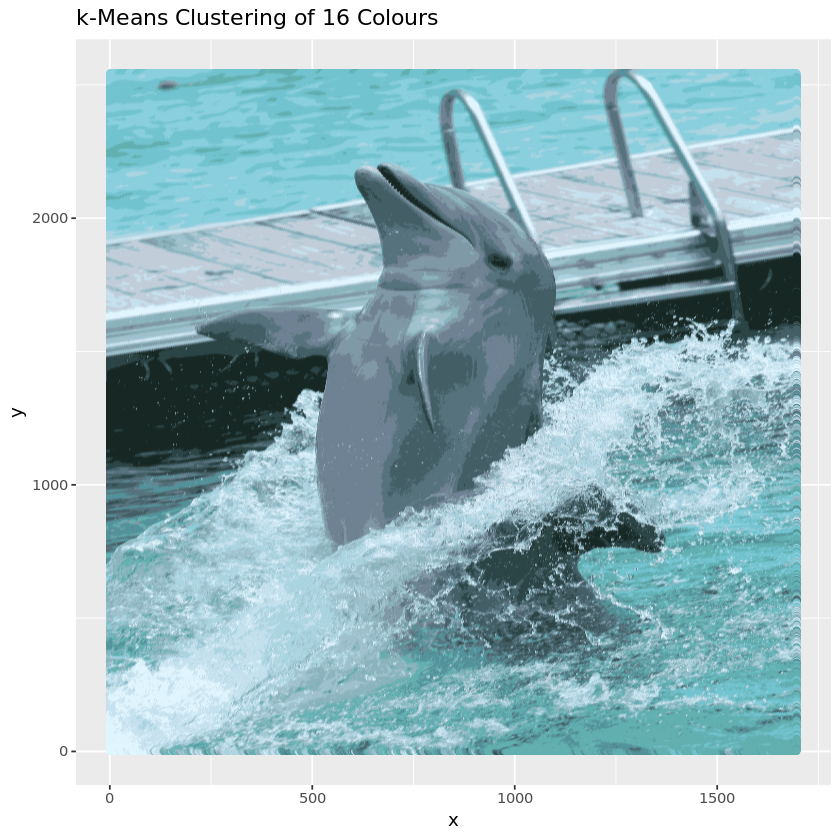

In [11]:
## Your Answer Code Here: ##

## let's start using 16 clusters ## 

# We are now trying to compress the image to 16 colours
kClusters <- 16
kMeans16 <- kmeans(picRGB[, c("R", "G", "B")], centers = kClusters)

kColours <- rgb(kMeans16$centers[kMeans16$cluster,])

ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")


<div align="right">
<a href="#p5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p5" class="collapse">
```
# We are now trying to compress the image to 16 colours
kClusters <- 16
kMeans16 <- kmeans(picRGB[, c("R", "G", "B")], centers = kClusters)

kColours <- rgb(kMeans16$centers[kMeans16$cluster,])

ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")
    
```
</div>

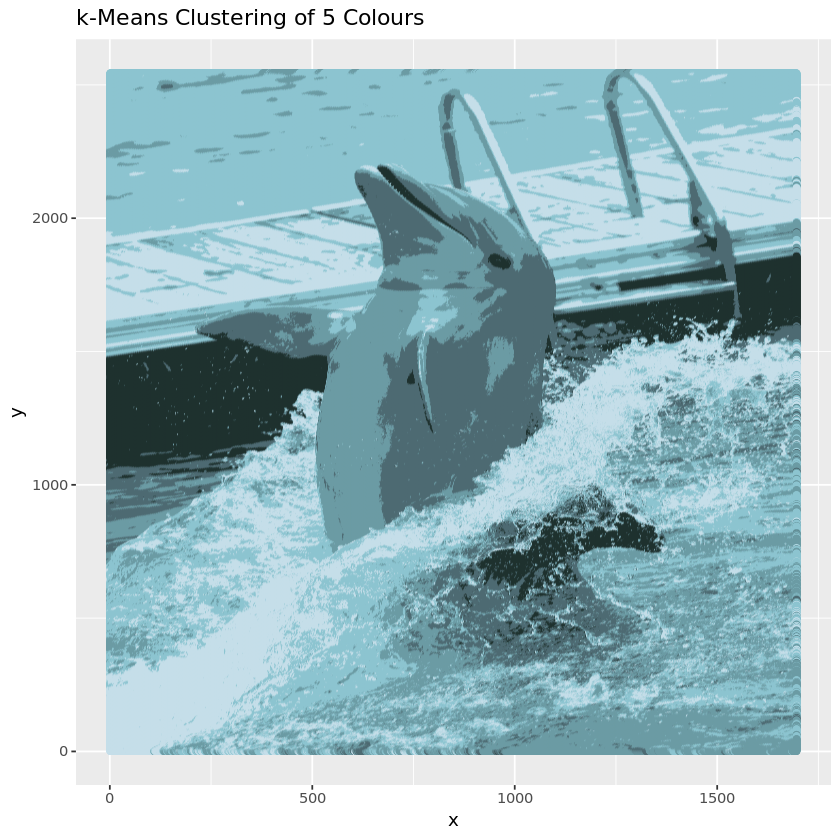

In [12]:
# Changing the k to 5
kClusters <- 5
kMeans5 <- kmeans(picRGB[, c("R", "G", "B")], centers = kClusters)

kColours <- rgb(kMeans5$centers[kMeans5$cluster,])

ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")

#As you can see the image got quite blurred using only 5 colours

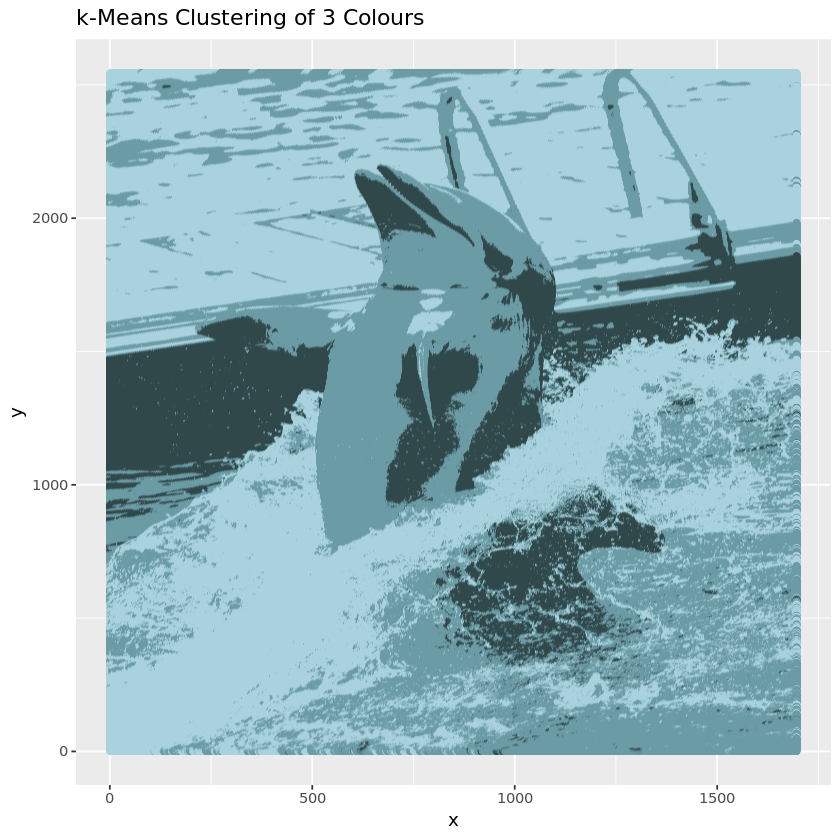

In [13]:
# Lastly we further compress the picture to 3 colours
kClusters <- 3
kMeans3 <- kmeans(picRGB[, c("R", "G", "B")], centers = kClusters)

kColours <- rgb(kMeans3$centers[kMeans3$cluster,])

ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")
# Look at how the K value changes the sharpness of the imag!
# It looks like the dolphine is disappearing in the water!

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thanks for completing this lesson!

Notebook created by: Christina Y. Zheng

<hr>
Copyright &copy; 2017 [IBM Cognitive Class](https://cocl.us/ML0151_cclab). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).